<a href="https://colab.research.google.com/github/saurabhgwari/Correlation-Analysis/blob/main/Movie_Correlation_Project_from_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Upload data

In [66]:
import pandas as pd
import io
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the config of plots we will create

for local file : 

In [ ]:
#from google.colab import files
#uploaded = files.upload()

#df = pd.read_csv(io.BytesIO(uploaded['movies.csv']), encoding='latin-1')

For github csv file 

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/saurabhgwari/Correlation-Analysis/main/movies.csv', encoding='latin-1')

df.head()

budget                                 company  ...         writer  year
0   8000000.0           Columbia Pictures Corporation  ...   Stephen King  1986
1   6000000.0                      Paramount Pictures  ...    John Hughes  1986
2  15000000.0                      Paramount Pictures  ...       Jim Cash  1986
3  18500000.0  Twentieth Century Fox Film Corporation  ...  James Cameron  1986
4   9000000.0                    Walt Disney Pictures  ...  Mark H. Baker  1986

[5 rows x 15 columns]

# Cleaning & formating data

In [87]:
df

budget  ... year_correct
6380  245000000  ...         2015
5061  237000000  ...         2009
2420  200000000  ...         1997
6391  150000000  ...         2015
5723  220000000  ...         2012
...         ...  ...          ...
5917          0  ...         2013
5699          0  ...         2012
6066          0  ...         2014
2594   15000000  ...         1997
6784          0  ...         2016

[6820 rows x 15 columns]

In [69]:
# Loop to check if there is any missing data :

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [70]:
# Data Types for our columns 

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [71]:
# 'budget' & 'gross' columns are showing as float but we don't want decimal values so let's change to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [72]:
# 'year' & 'released' are not same for some rows, let's extract year from 'released' column and drop 'year'

df['year_correct'] = df['released'].astype('str').str[:4]
df.drop(columns='year', inplace=True)
df

budget  ... year_correct
0       8000000  ...         1986
1       6000000  ...         1986
2      15000000  ...         1986
3      18500000  ...         1986
4       9000000  ...         1986
5       6000000  ...         1987
6      25000000  ...         1986
7       6000000  ...         1986
8       9000000  ...         1986
9      15000000  ...         1986
10      8800000  ...         1986
11     16000000  ...         1986
12      6000000  ...         1986
13     25000000  ...         1986
14     15000000  ...         1986
15     17000000  ...         1986
16     10000000  ...         1986
17     25000000  ...         1986
18      2700000  ...         1986
19     35000000  ...         1986
20      2000000  ...         1986
21     11000000  ...         1986
22      4700000  ...         1986
23     15000000  ...         1986
24     25000000  ...         1986
25            0  ...         1986
26            0  ...         1986
27            0  ...         1986
28     25000000  ...         1986
29      1900000  ...         1987
30     25000000  ...         1986
31     25000000  ...         1986
32            0  ...         1986
33     24500000  ...         1986
34     13800000  ...         1986
35            0  ...         1986
36            0  ...         1986
37      6000000  ...         1986
38     10000000  ...         1986
39      3000000  ...         1986
40     25000000  ...         1986
41            0  ...         1986
42      4000000  ...         1986
43     10000000  ...         1986
44      4500000  ...         1986
45     18000000  ...         1986
46     19000000  ...         1986
47      1100000  ...         1986
48            0  ...         1986
49            0  ...         1986
50       111000  ...         1990
51     18000000  ...         1986
52      6400000  ...         1986
53     14000000  ...         1986
54      8500000  ...         1986
55      6000000  ...         1986
56            0  ...         1986
57      5000000  ...         1986
58     12000000  ...         1986
59            0  ...         1986
60      6000000  ...         1987
61            0  ...         1986
62      6500000  ...         1986
63            0  ...         1986
64            0  ...         1986
65            0  ...         1986
66     20000000  ...         1986
67     15000000  ...         1986
68     12000000  ...         1986
69            0  ...         1986
70            0  ...         1986
71            0  ...         1986
72            0  ...         1986
73            0  ...         1986
74     18000000  ...         1986
75            0  ...         1986
76            0  ...         1986
77       175000  ...         1986
78            0  ...         1986
79      8700000  ...         1986
80            0  ...         1986
81            0  ...         1986
82     12000000  ...         1986
83      1100000  ...         1986
84     10000000  ...         1986
85            0  ...         1989
86            0  ...         1986
87     18000000  ...         1986
88      5000000  ...         1986
89     25000000  ...         1986
90            0  ...         1987
91            0  ...         1986
92     40000000  ...         1986
93            0  ...         1988
94     10000000  ...         1986
95            0  ...         1986
96            0  ...         1986
97     12000000  ...         1986
98      2000000  ...         1987
99     14000000  ...         1986
100     8500000  ...         1986
101           0  ...         1986
102           0  ...         1986
103           0  ...         1987
104    18000000  ...         1986
105           0  ...         1986
106           0  ...         1986
107           0  ...         1986
108           0  ...         1987
109           0  ...         1986
110           0  ...         1986
111     8000000  ...         1986
112           0  ...         1987
113     3300000  ...         1986
114           0  ...         1986
115           0  ...         1986
116           0  ...         19

In [94]:
# incase we want to see all the data

pd.set_option('display.max_rows', None)

In [86]:
df

budget  ... year_correct
6380  245000000  ...         2015
5061  237000000  ...         2009
2420  200000000  ...         1997
6391  150000000  ...         2015
5723  220000000  ...         2012
...         ...  ...          ...
5917          0  ...         2013
5699          0  ...         2012
6066          0  ...         2014
2594   15000000  ...         1997
6784          0  ...         2016

[6820 rows x 15 columns]

In [74]:
# Drop any duplicates 

df.shape

(6820, 15)

In [75]:
# Get entire unique company list 

df['company'].drop_duplicates().sort_values(ascending=False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
2742                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produções
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

In [76]:
# Get Top 10 companies by frequency

df['company'].value_counts().sort_values(ascending=False).head(10)

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Columbia Pictures Corporation             166
Touchstone Pictures                       131
Columbia Pictures                         108
Walt Disney Pictures                      102
Metro-Goldwyn-Mayer (MGM)                 101
Name: company, dtype: int64

In [77]:
# Order entire dataset by 'Gross' column

df = df.sort_values(by=['gross'], ascending=False)

# Correlation Analysis

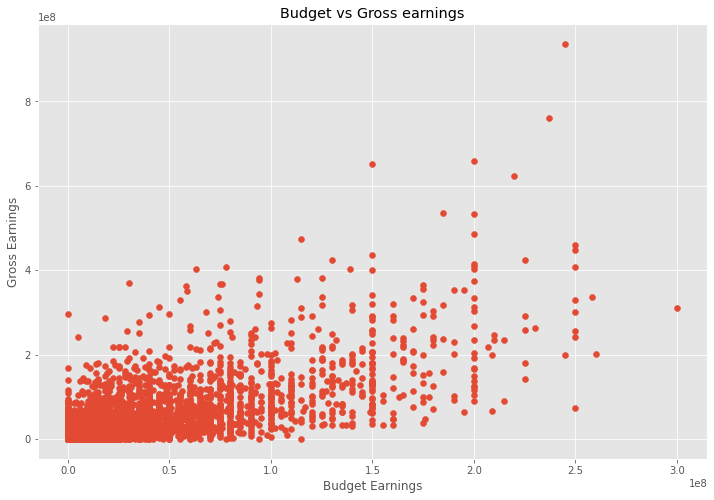

In [78]:
# Scatter plot for Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'] )
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget Earnings')
plt.ylabel('Gross Earnings')
plt.show()

In [79]:
# Quick check the above scatter plot 

df[['name','company','budget','gross']].sort_values(by='gross', ascending=False).head(10)

name  ...      gross
6380               Star Wars: The Force Awakens  ...  936662225
5061                                     Avatar  ...  760507625
2420                                    Titanic  ...  658672302
6391                             Jurassic World  ...  652270625
5723                               The Avengers  ...  623357910
4840                            The Dark Knight  ...  534858444
6614                                  Rogue One  ...  532177324
6687                               Finding Dory  ...  486295561
2870  Star Wars: Episode I - The Phantom Menace  ...  474544677
6398                    Avengers: Age of Ultron  ...  459005868

[10 rows x 4 columns]

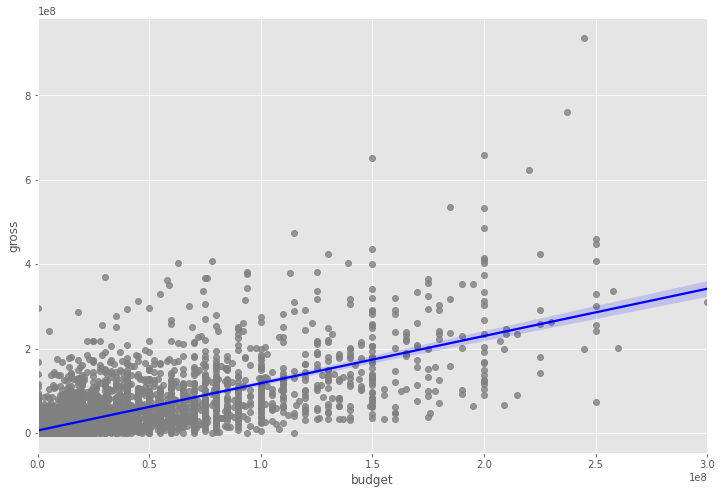

In [80]:
# now let's make a regression plot (budget vs gross) using seaborn

sns.regplot(x='budget', y='gross', data=df, 
            scatter_kws={"color":"grey"}, 
            line_kws={"color":"blue"})

In [81]:
# Let's look at correlation matrix now, but this is for numeric features only

df.corr(method="pearson")       # pearson(default), kendall, spearman

budget     gross   runtime     score     votes
budget   1.000000  0.712196  0.268226  0.042145  0.503924
gross    0.712196  1.000000  0.224579  0.165693  0.662457
runtime  0.268226  0.224579  1.000000  0.395343  0.317399
score    0.042145  0.165693  0.395343  1.000000  0.393607
votes    0.503924  0.662457  0.317399  0.393607  1.000000

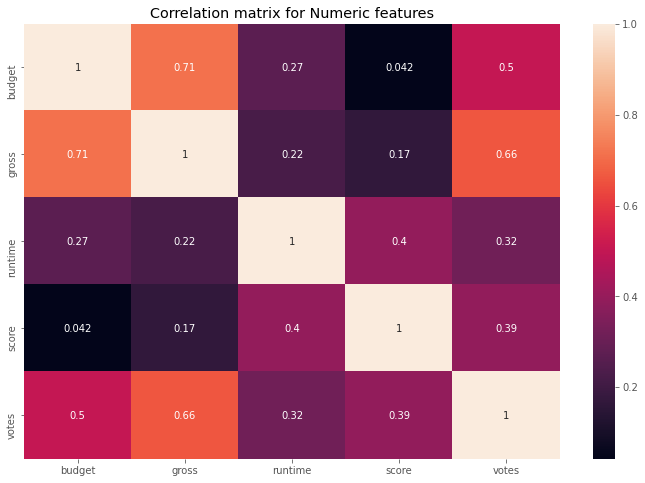

In [82]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric features')
plt.show()

In [ ]:
#  now let's also look at text features

df_numerized = df.copy()

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized

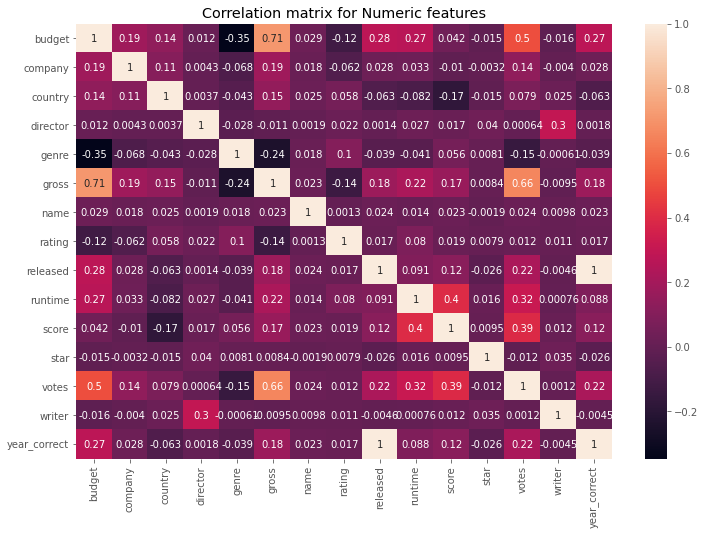

In [90]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric features')
plt.show()

In [91]:
correlation_matrix

budget   company   country  ...     votes    writer  year_correct
budget        1.000000  0.187205  0.137635  ...  0.503924 -0.015611      0.274820
company       0.187205  1.000000  0.107950  ...  0.138662 -0.004032      0.028012
country       0.137635  0.107950  1.000000  ...  0.078657  0.024981     -0.062707
director      0.011602  0.004320  0.003698  ...  0.000639  0.298997      0.001822
genre        -0.346794 -0.068330 -0.042793  ... -0.150519 -0.000608     -0.039014
gross         0.712196  0.187220  0.149988  ...  0.662457 -0.009455      0.176879
name          0.028712  0.018098  0.025020  ...  0.023665  0.009821      0.023411
rating       -0.119660 -0.062250  0.057979  ...  0.011678  0.010740      0.017438
released      0.276635  0.027898 -0.062609  ...  0.221736 -0.004635      0.999389
runtime       0.268226  0.033058 -0.081796  ...  0.317399  0.000759      0.088342
score         0.042145 -0.010426 -0.174414  ...  0.393607  0.012223      0.117679
star         -0.015061 -0.003160 -0.014566  ... -0.011919  0.035378     -0.026050
votes         0.503924  0.138662  0.078657  ...  1.000000  0.001154      0.220797
writer       -0.015611 -0.004032  0.024981  ...  0.001154  1.000000     -0.004546
year_correct  0.274820  0.028012 -0.062707  ...  0.220797 -0.004546      1.000000

[15 rows x 15 columns]

In [95]:
# Unstacking 

corr_pairs = correlation_matrix.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
              gross           0.712196
              name            0.028712
              rating         -0.119660
              released        0.276635
              runtime         0.268226
              score           0.042145
              star           -0.015061
              votes           0.503924
              writer         -0.015611
              year_correct    0.274820
company       budget          0.187205
              company         1.000000
              country         0.107950
              director        0.004320
              genre          -0.068330
              gross           0.187220
              name            0.018098
              rating         -0.062250
              released        0.027898
              runtime         0.033058
              score      

In [96]:
sort_pairs = corr_pairs.sort_values()

In [97]:
sort_pairs

genre         budget         -0.346794
budget        genre          -0.346794
genre         gross          -0.242676
gross         genre          -0.242676
country       score          -0.174414
score         country        -0.174414
votes         genre          -0.150519
genre         votes          -0.150519
rating        gross          -0.135538
gross         rating         -0.135538
rating        budget         -0.119660
budget        rating         -0.119660
country       runtime        -0.081796
runtime       country        -0.081796
company       genre          -0.068330
genre         company        -0.068330
country       year_correct   -0.062707
year_correct  country        -0.062707
country       released       -0.062609
released      country        -0.062609
company       rating         -0.062250
rating        company        -0.062250
country       genre          -0.042793
genre         country        -0.042793
runtime       genre          -0.041357
genre         runtime    

In [99]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

votes         budget          0.503924
budget        votes           0.503924
gross         votes           0.662457
votes         gross           0.662457
gross         budget          0.712196
budget        gross           0.712196
released      year_correct    0.999389
year_correct  released        0.999389
budget        budget          1.000000
rating        rating          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
writer        writer          1.000000
year_correct  year_correct    1.000000
dtype: float64